In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans


In [2]:
df = pd.read_csv("marketing_campaign (2).csv",sep='\t')
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [3]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,2240.0,5592.159821,3246.662198,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1968.805804,11.984069,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,52247.251354,25173.076661,1730.0,35303.00,51381.5,68522.00,666666.0
Kidhome,2240.0,0.444196,0.538398,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,0.506250,0.544538,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,49.109375,28.962453,0.0,24.00,49.0,74.00,99.0
MntWines,2240.0,303.935714,336.597393,0.0,23.75,173.5,504.25,1493.0
MntFruits,2240.0,26.302232,39.773434,0.0,1.00,8.0,33.00,199.0
MntMeatProducts,2240.0,166.950000,225.715373,0.0,16.00,67.0,232.00,1725.0
MntFishProducts,2240.0,37.525446,54.628979,0.0,3.00,12.0,50.00,259.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [6]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

In [7]:
df.columns = df.columns.str.lower()
df

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [8]:
df.isnull().sum()

id                      0
year_birth              0
education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
dt_customer             0
recency                 0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
acceptedcmp3            0
acceptedcmp4            0
acceptedcmp5            0
acceptedcmp1            0
acceptedcmp2            0
complain                0
z_costcontact           0
z_revenue               0
response                0
dtype: int64

In [9]:
df.fillna(0)

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [10]:
df.isnull().sum()

id                      0
year_birth              0
education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
dt_customer             0
recency                 0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
acceptedcmp3            0
acceptedcmp4            0
acceptedcmp5            0
acceptedcmp1            0
acceptedcmp2            0
complain                0
z_costcontact           0
z_revenue               0
response                0
dtype: int64

In [11]:
df = df.fillna(0)
df

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,...,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,13-06-2013,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,10-06-2014,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,25-01-2014,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,24-01-2014,8,428,...,3,0,0,0,0,0,0,3,11,0


In [12]:
df.drop(columns=['ID'], inplace=True, errors='ignore')

In [13]:
df.isnull().sum()

id                     0
year_birth             0
education              0
marital_status         0
income                 0
kidhome                0
teenhome               0
dt_customer            0
recency                0
mntwines               0
mntfruits              0
mntmeatproducts        0
mntfishproducts        0
mntsweetproducts       0
mntgoldprods           0
numdealspurchases      0
numwebpurchases        0
numcatalogpurchases    0
numstorepurchases      0
numwebvisitsmonth      0
acceptedcmp3           0
acceptedcmp4           0
acceptedcmp5           0
acceptedcmp1           0
acceptedcmp2           0
complain               0
z_costcontact          0
z_revenue              0
response               0
dtype: int64

In [14]:
df.col = list(df.dtypes[df.dtypes == "object"].index)
df.col

C:\Users\ACE\AppData\Local\Temp\ipykernel_26300\1227444193.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df.col = list(df.dtypes[df.dtypes == "object"].index)


['education', 'marital_status', 'dt_customer']

In [15]:
categorical_variables = ["education", "marital_status", "dt_customer"]

In [16]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
print(num_cols)


Index(['id', 'year_birth', 'income', 'kidhome', 'teenhome', 'recency',
       'mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts',
       'mntsweetproducts', 'mntgoldprods', 'numdealspurchases',
       'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases',
       'numwebvisitsmonth', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5',
       'acceptedcmp1', 'acceptedcmp2', 'complain', 'z_costcontact',
       'z_revenue', 'response'],
      dtype='object')


In [17]:
numerical_variables = ['year_birth', 'income', 'kidhome', 'teenhome', 'recency',
       'mntwines', 'mntfruits', 'mntmeatproducts', 'mntfishproducts',
       'mntsweetproducts', 'mntgoldprods', 'numdealspurchases',
       'numwebpurchases', 'numcatalogpurchases', 'numstorepurchases',
       'numwebvisitsmonth', 'acceptedcmp3', 'acceptedcmp4', 'acceptedcmp5',
       'acceptedcmp1', 'acceptedcmp2', 'complain', 'z_costcontact',
       'z_revenue']
numerical_variables

['year_birth',
 'income',
 'kidhome',
 'teenhome',
 'recency',
 'mntwines',
 'mntfruits',
 'mntmeatproducts',
 'mntfishproducts',
 'mntsweetproducts',
 'mntgoldprods',
 'numdealspurchases',
 'numwebpurchases',
 'numcatalogpurchases',
 'numstorepurchases',
 'numwebvisitsmonth',
 'acceptedcmp3',
 'acceptedcmp4',
 'acceptedcmp5',
 'acceptedcmp1',
 'acceptedcmp2',
 'complain',
 'z_costcontact',
 'z_revenue']

<Axes: >

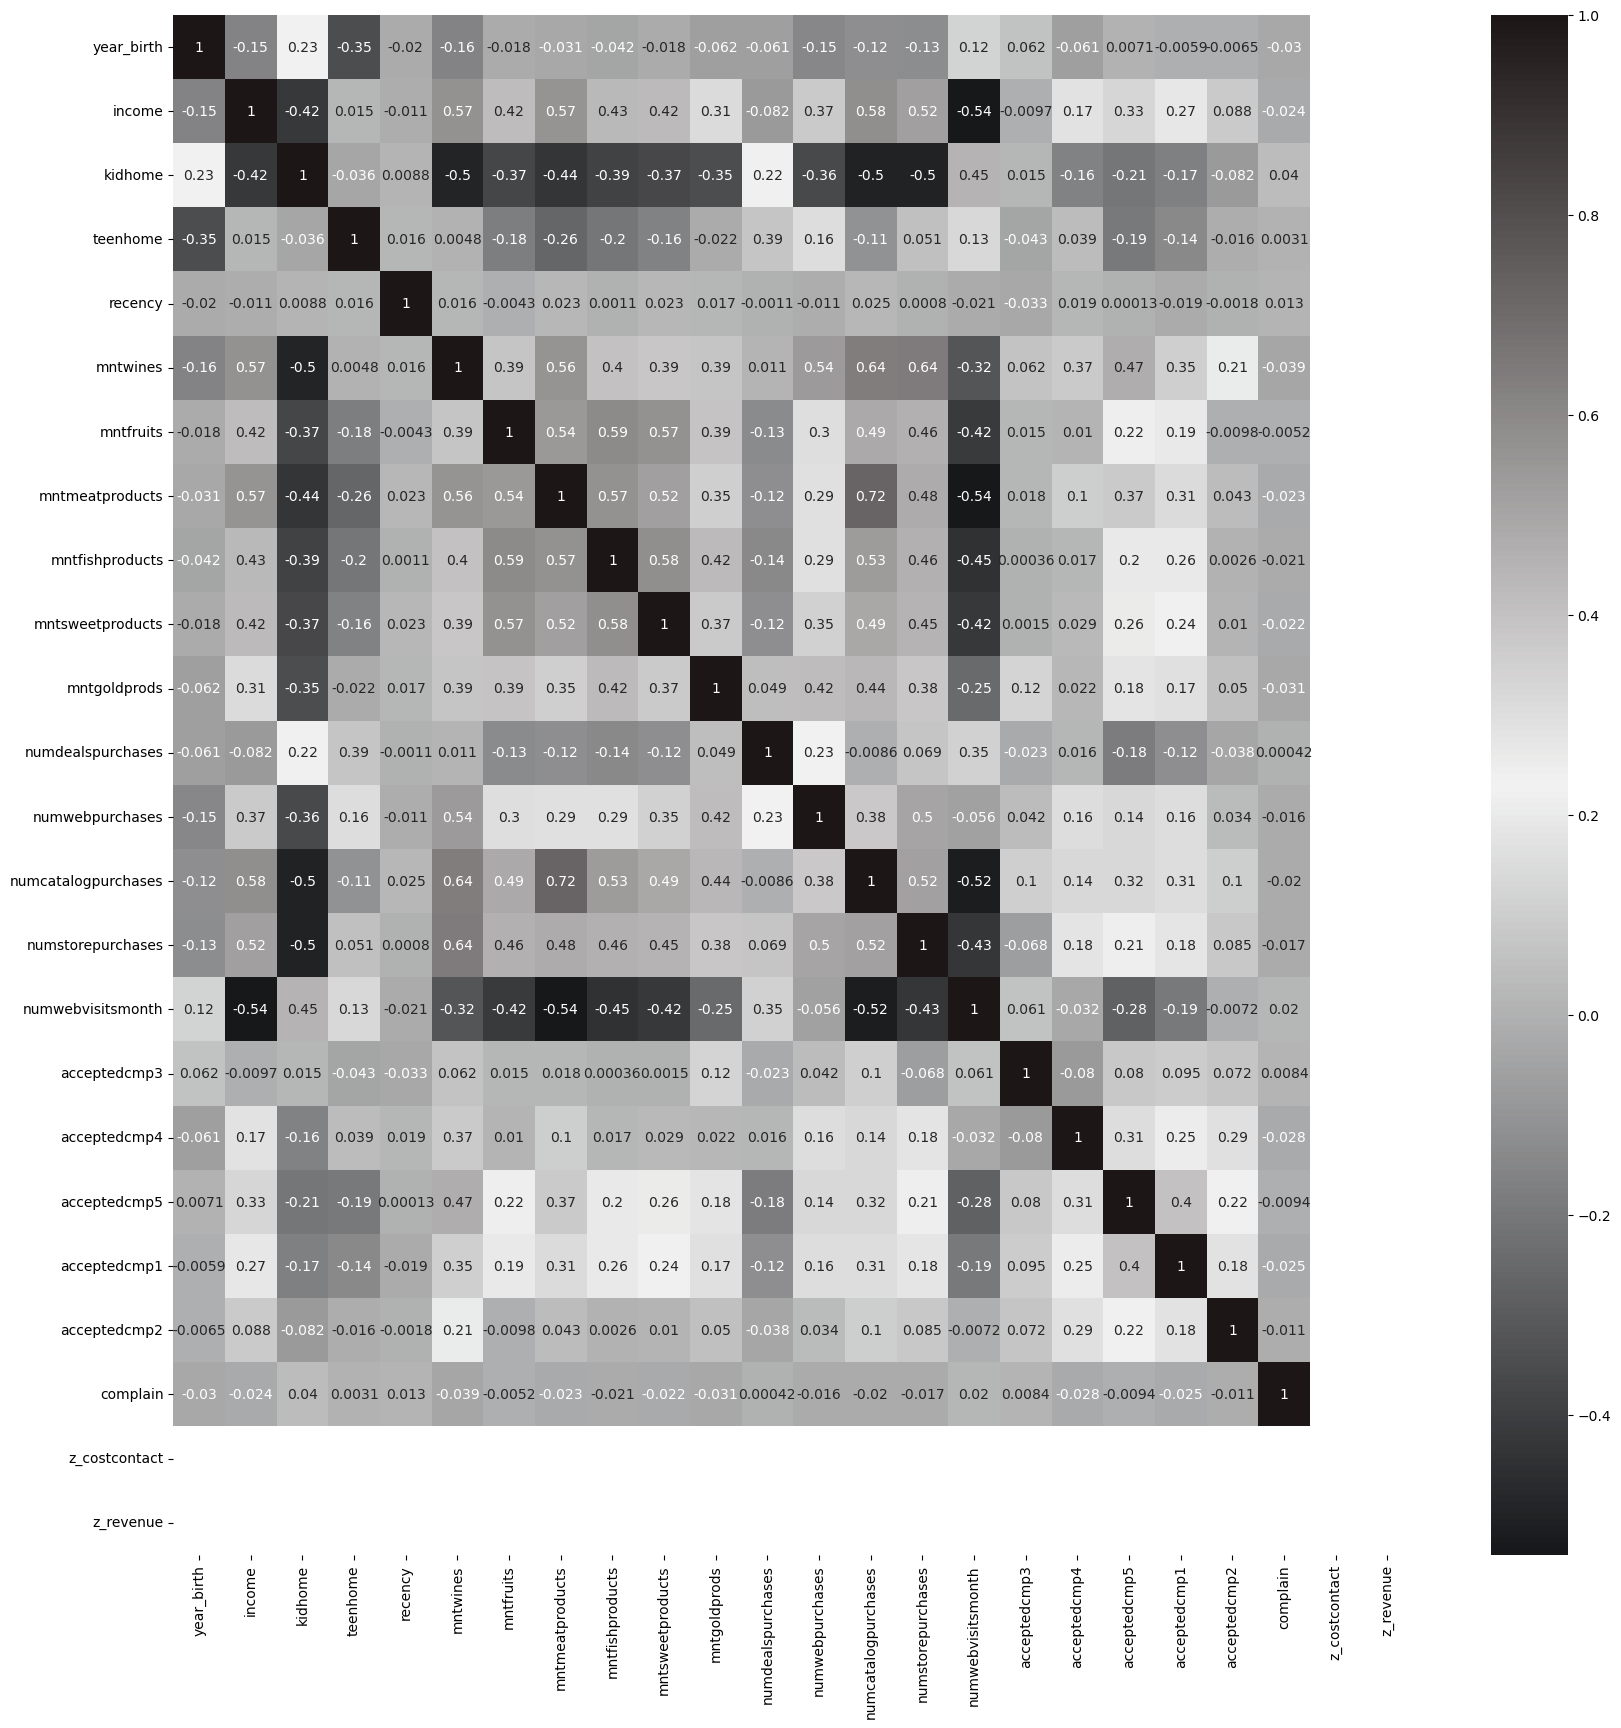

In [18]:
fig = plt.figure(figsize = (20, 20))
cmap = sns.diverging_palette(250, 10, s = 9, n = 10, l = 8, as_cmap = True)
sns.heatmap(df[numerical_variables].corr(), annot = True, cmap = cmap)

In [19]:
features = df[numerical_variables]
features

,year_birth,income,kidhome,teenhome,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,...,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue
0,1957,58138.0,0,0,58,635,88,546,172,88,...,4,7,0,0,0,0,0,0,3,11
1,1954,46344.0,1,1,38,11,1,6,2,1,...,2,5,0,0,0,0,0,0,3,11
2,1965,71613.0,0,0,26,426,49,127,111,21,...,10,4,0,0,0,0,0,0,3,11
3,1984,26646.0,1,0,26,11,4,20,10,3,...,4,6,0,0,0,0,0,0,3,11
4,1981,58293.0,1,0,94,173,43,118,46,27,...,6,5,0,0,0,0,0,0,3,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1967,61223.0,0,1,46,709,43,182,42,118,...,4,5,0,0,0,0,0,0,3,11
2236,1946,64014.0,2,1,56,406,0,30,0,0,...,5,7,0,0,0,1,0,0,3,11
2237,1981,56981.0,0,0,91,908,48,217,32,12,...,13,6,0,1,0,0,0,0,3,11
2238,1956,69245.0,0,1,8,428,30,214,80,30,...,10,3,0,0,0,0,0,0,3,11


In [20]:
scaler = StandardScaler()
X_scaler = scaler.fit_transform(features)
X_scaler

array([[-0.98534473,  0.25193856, -0.82521765, ..., -0.09728167,
         0.        ,  0.        ],
       [-1.23573295, -0.20869932,  1.03255877, ..., -0.09728167,
         0.        ,  0.        ],
       [-0.3176428 ,  0.77823121, -0.82521765, ..., -0.09728167,
         0.        ,  0.        ],
       ...,
       [ 1.01776106,  0.20674965, -0.82521765, ..., -0.09728167,
         0.        ,  0.        ],
       [-1.06880747,  0.68574431, -0.82521765, ..., -0.09728167,
         0.        ,  0.        ],
       [-1.23573295,  0.04614739,  1.03255877, ..., -0.09728167,
         0.        ,  0.        ]])

In [21]:
pca = PCA(n_components = 5, random_state = 42)
pca.fit(X_scaler)
reg_pca = pca.transform(X_scaler)

In [22]:
explained_variance_ratio = pca.explained_variance_ratio_
print(explained_variance_ratio)

[0.29243528 0.09154638 0.07781852 0.05928683 0.04764049]


In [23]:
explained_variance_ratio = pca.explained_variance_ratio_
print("the sum of the explained_variance_ratio", np.cumsum(explained_variance_ratio))

the sum of the explained_variance_ratio [0.29243528 0.38398166 0.46180019 0.52108702 0.56872751]


In [24]:
k = np.arange(1, 21)

In [25]:
kmean = KMeans(n_clusters = 5, random_state = 42)
kmean.fit(X_scaler)

KMeans(n_clusters=5, random_state=42)

In [26]:
y_pred = kmean.predict(X_scaler)
y_pred

array([2, 0, 4, ..., 1, 1, 0], dtype=int32)

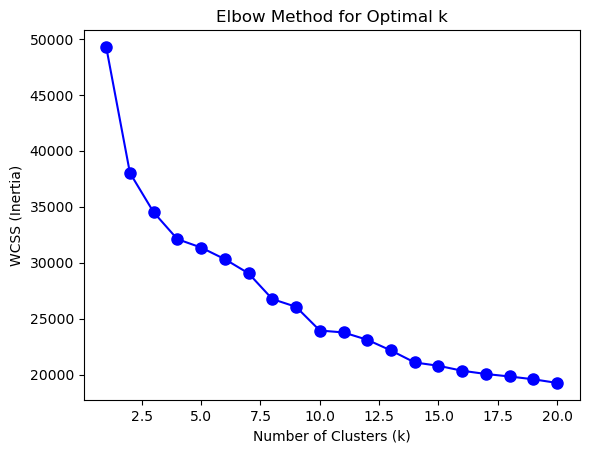

In [27]:
wcss = []   # list to store inertia values (WCSS)
K = np.arange(1,21)   # test k from 1 to 10

for k in K:
    kmean = KMeans(n_clusters=k, random_state=42)
    kmean.fit(X_scaler)   # use your scaled features
    wcss.append(kmean.inertia_)  # inertia_ = WCSS

# Plot the elbow curve
plt.plot(K, wcss, 'bo-', markersize=8)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for Optimal k")
plt.show()

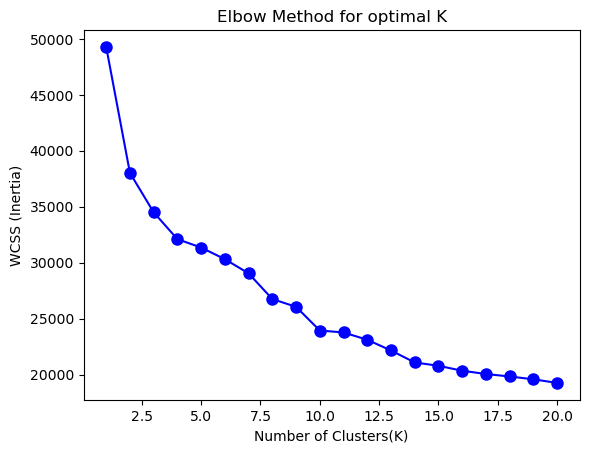

In [28]:
wcss = []
k = np.arange(1, 21)

for k in k:
    kmean = KMeans(n_clusters = k, random_state = 42)
    kmean.fit(X_scaler)
    wcss.append(kmean.inertia_)
plt.plot(K, wcss, 'bo-', markersize = 8)
plt.xlabel("Number of Clusters(K)")
plt.ylabel("WCSS (Inertia)")
plt.title("Elbow Method for optimal K")
plt.show()

In [29]:
from sklearn.metrics import davies_bouldin_score

In [30]:
km = davies_bouldin_score(X_scaler, kmean.labels_)
km

np.float64(1.8617098109194032)

In [31]:
for k in range(2, 7):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(X_scaler)
    score = silhouette_score(X_scaler, labels)
    print(f"k={k}, Silhouette Score={score:.3f}")

k=2, Silhouette Score=0.272
k=3, Silhouette Score=0.199
k=4, Silhouette Score=0.204
k=5, Silhouette Score=0.187
k=6, Silhouette Score=0.175


In [32]:
for k in range(2, 7):
    kmeans = KMeans(n_clusters = k, random_state = 42)
    labels = kmeans.fit_predict(X_scaler)
    score = davies_bouldin_score(X_scaler, labels)
    print(f"k={k}, davies_bouldin_score = {score:.3f}")

k=2, davies_bouldin_score = 1.694
k=3, davies_bouldin_score = 2.070
k=4, davies_bouldin_score = 2.036
k=5, davies_bouldin_score = 2.437
k=6, davies_bouldin_score = 2.376


In [33]:
from scipy.cluster.hierarchy import ward, dendrogram
import scipy.cluster.hierarchy as sch

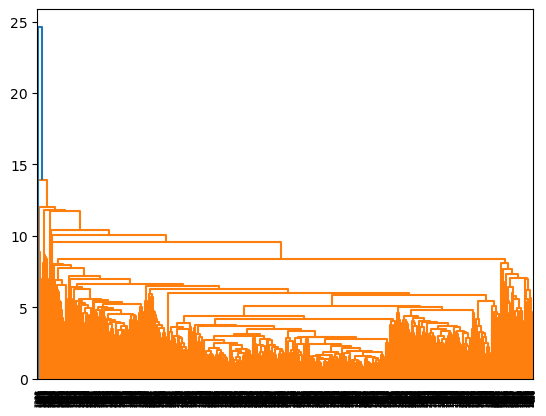

<Figure size 1000x800 with 0 Axes>

In [34]:
linkage = sch.linkage(X_scaler, method = "average", metric = "euclidean")
dendrogram = sch.dendrogram(linkage)
ig = plt.figure(figsize = (10,8))


In [35]:
from sklearn.cluster import AgglomerativeClustering

In [36]:
cluster = AgglomerativeClustering(n_clusters = 5, linkage = "ward", metric = "euclidean")
cluster = cluster.fit_predict(X_scaler)
cluster

array([0, 1, 0, ..., 2, 0, 1])

In [40]:
from sklearn.mixture import GaussianMixture

In [41]:
k = 6

In [43]:
Gmm = GaussianMixture(n_components = k, random_state = 42)
gmm = Gmm.fit(X_scaler)

In [44]:
y_pred = gmm.predict_proba(X_scaler)
y_pred

array([[0.00000000e+000, 5.04257663e-046, 1.00000000e+000,
        9.88555424e-023, 1.44334549e-010, 3.25081043e-014],
       [1.00000000e+000, 1.67651227e-019, 1.30322784e-011,
        1.47790721e-033, 1.77504521e-026, 0.00000000e+000],
       [7.52513264e-121, 3.30936969e-020, 9.95811857e-001,
        1.45936243e-022, 2.31373235e-010, 4.18814271e-003],
       ...,
       [0.00000000e+000, 9.42302374e-016, 0.00000000e+000,
        6.37106948e-023, 1.09360061e-012, 1.00000000e+000],
       [2.15112699e-081, 1.59430135e-018, 3.77705702e-002,
        4.64029160e-025, 4.48250376e-013, 9.62229430e-001],
       [9.99999999e-001, 3.44710872e-016, 1.48869012e-009,
        1.45949647e-030, 4.97699297e-026, 0.00000000e+000]])

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import matplotlib.colors as listedcolors